# Linear regression with multiple variables (Part 1)

This is a python implementation of the Linear Regression exercise in week 2 of Coursera's online Machine Learning 
course, taught by Dr. Andrew Ng. We are provided with data for house sizes in square feet and number of bedrooms.
The task is to use linear regression to determine how the size and the number of bedrooms affects price of the house. Our ultimate aim is to predict the price of a new house given the size in square feet and the number of bedrooms.

In [2]:
#Let's start by importing relevant python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's import the data into a Pandas dataframe called data. There are 3 columns in the dataset, Size, Bedrooms, and Price.

In [3]:
data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])

In [4]:
data2.head() ## View the first 5 records of the dataset.

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
X = data2.drop(['Price'], axis=1)  ## Assign all but the price field to the independent variable X
y = data2['Price'] ## Assign the price field to the dependent variable y 
m=len(y) ## m is the length of the training set

# Feature Scaling

Looking at the values in the table above, we see that house sizes are about 1000 times the number of bedrooms. When
features differ by such orders of magnitude, feature scaling becomes really important as it helps the 
gradient descent algorithm to converge faster. 

We will use the function below to normalize our features. The method we use is to subtract each feature from its 
mean and then divide by its standard deviation.

In [6]:
def featureNormalize(X):
    '''
    This function takes the features as input and
    returns the normalized values, the mean, as well 
    as the standard deviation for each feature.
    '''
    X_norm = (X - np.mean(X))/np.std(X)
    mu = np.mean(X)
    sigma = np.std(X)
    return X_norm, mu, sigma


X, mean, std = featureNormalize(X) ## We call the function over the features

In [7]:
X = np.append(np.ones([m,1]), X, axis=1) ## Append the bias term (field containing all ones) to X.

In [8]:
y = np.array(y).reshape(-1,1) ## reshape y to mx1 array.

In [9]:
theta = np.zeros([3,1]) ## Initialize theta (the coefficient) to a 3x1 zero vector.

# Cost Function

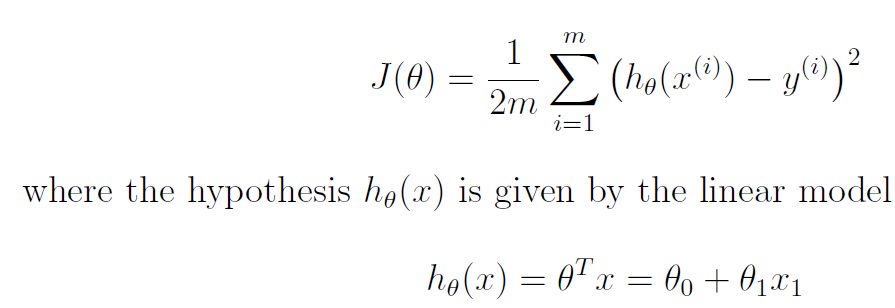

We define the function to compute the cost (error of prediction).

In [13]:
def computeCostMulti(X,y, theta):
    '''
    This function takes in the the values for 
    the training set as well as initial values 
    of theta and returns the cost(J).
    '''
    m = len(y) ## length of the training data
    h = X.dot(theta) ## The hypothesis
    J = 1/(2*m)*(np.sum((h-y)**2)) ## Implementing the cost function
    return J

cost = computeCostMulti(X,y,theta) ## Call the function 

print(cost)

65591548106.45744


We will attempt to minimize this value (65591548106.45744) using the gradient descent algorithm.

# Gradient Descent

# 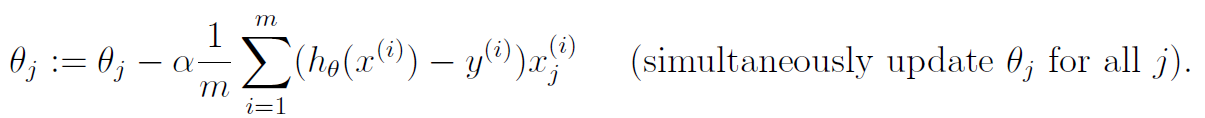

We define the gradient descent function.

In [11]:
def gradientDescentMulti(X, y, theta, alpha, iter):
    '''
    This function takes in the values of the training set, 
    as well the intial theta values(coefficients), the 
    learning rate, and the number of iterations. The output 
    will be the a new set of coefficeients(theta), optimized 
    for making predictions, as well as the array of the cost 
    as it depreciates on each iteration.
    '''
    J_history = [] ## Array for storing the cost values on each iteration.
    m = len(y) ## Length of the training set
    for i in range(iter): ## Loop for 400 iterations
        h = X.dot(theta) ## The hypothesis
        theta = theta - (alpha/m)*(X.T.dot(h-y)) ## Gradient descent function
        J_history.append(computeCostMulti(X, y, theta)) ## Append the cost to the J_history array
    return theta, J_history ## Return the final values of theta and the J_history array


iter = 400 ## Initialize the iteration parameter.
alpha = 0.01 ## Initialize the learning rate.

## Call the function and pass in the parameters to compute new coefficient.
new_theta, J_history = gradientDescentMulti(X, y, theta, alpha, iter)

print (new_theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


Now we use the optimized coefficients to recompute the cost to see if there's been any change.

In [15]:
new_cost = computeCostMulti(X,y,new_theta) ## We call the function again, but use the new coefficients.

In [891]:
print(new_cost)

2105448288.6292474

The cost was 65591548106.45744, it is now 2105448288.6292474. There's a huge improvement.

Let's plot cost against number of iterations to see how the cost changed as the algorithm ran.

Text(0.5, 1.0, 'Minimizing Cost Using Gradient Descent')

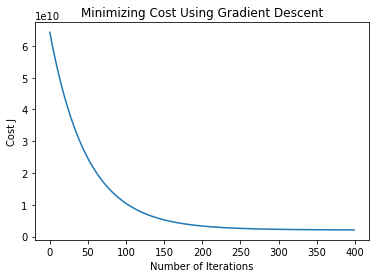

In [846]:
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')

The graph shows that cost fell steadily until about the 200th iteration, then it kind of flattened out. 
This also proves the gradient descent algorithm performed well.

# Selecting Learning Rate

The task here is to use the gradient descent algorithm to test several learning rates in order to select the most 
efficient one. We test the following values as learning rates 0.3,0.1,0.03,0.01, 0.003, and 0.001. We run the gradient 
descent algorithm on each occasion for 50 iterations, then we plot the cost against number of iterations for each 
learning rate, to determine the learning rate that converges faster than all the others.

In [847]:
## Call the gradient descent algorithm with a different learning rate on each occassion. 
## All other parameters remain constant
theta_1, J_history_1 = gradientDescentMulti(X, y, theta, 0.3, 50)
theta_2, J_history_2 = gradientDescentMulti(X, y, theta, 0.1, 50)
theta_3, J_history_3 = gradientDescentMulti(X, y, theta, 0.03, 50)
theta_4, J_history_4 = gradientDescentMulti(X, y, theta, 0.01, 50)
theta_5, J_history_5 = gradientDescentMulti(X, y, theta, 0.003, 50)
theta_6, J_history_6 = gradientDescentMulti(X, y, theta, 0.001, 50)

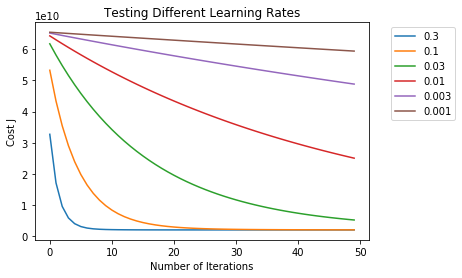

In [848]:
## Plot the cost againt number of iterations for each learning rate
plt.plot(J_history_1, label='0.3')
plt.plot(J_history_2, label='0.1')
plt.plot(J_history_3, label='0.03')
plt.plot(J_history_4, label='0.01')
plt.plot(J_history_5, label='0.003')
plt.plot(J_history_6, label='0.001')
plt.title('Testing Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend(bbox_to_anchor=(1.05, 1.0))

The graph shows that the curve in blue, which represents a learning rate of 0.3 converges faster than all the other curves. Therefore the best learning rate for this model is 0.3.

Now that we know the best learning rate is 0.3, we run the algorithm again using 0.3 as learning rate to obtain a fresh set of coefficients.

In [892]:
## Using the best learning rate (0.3), we run gradient descent again to find the coefficients.
theta, J_history = gradientDescentMulti(X, y, theta, 0.3, 1500)

In [893]:
print(theta) ## Print the new theta values.

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


We have further optimized our coefficients, now we are ready to predict housing prices.

# Prediction

We need to predict the price of a house with an area of 1650 square feet and has 3 bedrooms. 
First we need to normalize the features, then add the bias term (1) to X.

X = [1650, 3]

In [897]:
## TO PREDICT THE PRICE OF A HOUSE WITH 1650 SQUARE FEET AND 3 BEDROOMS
#First normalize the features
X = np.array([1650, 3]) ## Convert X to a numpy array

X = (X - mean)/std   ## Normalize X by subtracting the mean of the distribution from X, and then divide by 
the standard deviation.

X = np.append(1, X) ## Add the bias term

X = np.reshape(X, (1,3)) ## Reshape X to a 1x3 array

print(X) ## Print X to see waht it currently looks like

[[ 1.         -0.44604386 -0.22609337]]


Define a function for predicting house prices.

In [898]:
def prediction(X, theta):
    '''
    This function takes in the features of the house 
    as well as the coefficients, and returns the 
    predicted price.
    '''
    return np.dot(X, theta)

In [899]:
pred = prediction(X, theta) ## Call the function 

In [900]:
print(pred)

[[293081.4643349]]


We obtain 293081.46433489 as the predicted price for a house with an area of 1650 square feet and has 3 bedrooms. We can use the coefficients generated above to predict the price of any house as long as we have the size and the number of rooms. We will make a note of this prediction, we will need to compare it to the prediction when we use the normal equation to solve the same problem in part 2.

Gradient descent is cumbersome to implement, but it is very popular because it scales well with large datasets.